<a href="https://colab.research.google.com/github/khoile99999/Heuristic_Search_CMPUT_498/blob/main/Copy_of_GA_melih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing the Dataset

In [ ]:
!pip install maze-dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 956.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.27.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/My Drive/498-presentation/"

/content/drive/My Drive/498-presentation


https://github.com/understanding-search/maze-dataset

In [ ]:
from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset import MazeDataset, MazeDatasetConfig, LatticeMazeGenerators, SolvedMaze
from maze_dataset.tokenization import MazeTokenizer, TokenizationMode
from maze_dataset.plotting import plot_dataset_mazes
from maze_dataset.plotting.print_tokens import display_color_tokens_rgb, display_color_tokens_cmap, display_color_maze_tokens_AOTP
from maze_dataset.utils import corner_first_ndindex
import numpy as np
import math

n_mazes = 500
maze_size = 10
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="main", # name is only for you to keep track of things
	grid_n=maze_size, # number of rows/columns in the lattice
	n_mazes=n_mazes, # number of mazes to generate
	maze_ctor=LatticeMazeGenerators.gen_dfs_percolation, # algorithm to generate the maze
    maze_ctor_kwargs=dict(p=0.3), # additional parameters to pass to the maze generation algorithm
)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
dataset: MazeDataset = MazeDataset.from_config(
    # your config
	cfg,
    # and all this below is completely optional
	# do_download=False,
	# load_local=False,
	# do_generate=True,
    # save_local=True,
	# gen_parallel=False,
)

In [ ]:
len(dataset)

500

In [ ]:
# plot_dataset_mazes(dataset)

Visualizing a maze

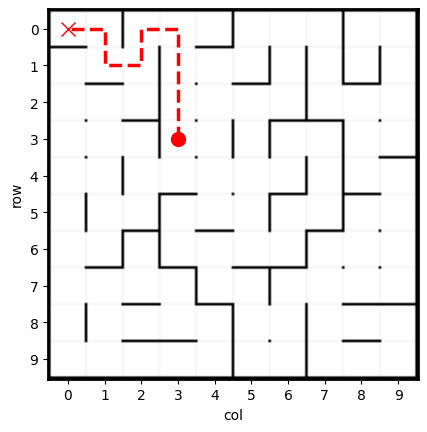

In [ ]:
# advanced visualization with many features
from maze_dataset.plotting import MazePlot
MazePlot(dataset[4]).plot()

In [ ]:
dataset[4].connection_list[0] # DOWN AND UP CONNECTIONS. If true, it means you can pass.

array([[False,  True,  True,  True, False,  True,  True,  True,  True,
         True],
       [ True, False,  True,  True,  True, False,  True,  True, False,
         True],
       [ True,  True, False,  True,  True,  True, False, False,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True,  True, False,  True,  True, False,  True, False,
         True],
       [ True,  True, False,  True, False,  True,  True, False,  True,
         True],
       [ True, False,  True, False,  True, False, False,  True,  True,
         True],
       [ True,  True, False,  True, False,  True,  True,  True, False,
        False],
       [ True,  True, False, False,  True,  True,  True,  True, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
dataset[4].connection_list[1] # SIDEWAYS CONNECTIONS. If ture, it means you can pass.

array([[ True, False,  True,  True, False,  True,  True, False,  True,
        False],
       [ True,  True, False,  True,  True, False, False, False, False,
        False],
       [ True,  True, False,  True,  True,  True, False,  True,  True,
        False],
       [ True,  True, False,  True, False, False,  True, False,  True,
        False],
       [ True, False,  True,  True,  True,  True, False, False,  True,
        False],
       [False,  True, False,  True,  True, False,  True, False,  True,
        False],
       [ True, False, False,  True,  True,  True, False,  True,  True,
        False],
       [ True,  True,  True, False,  True, False,  True,  True,  True,
        False],
       [False,  True,  True,  True, False,  True, False,  True,  True,
        False],
       [ True,  True,  True,  True, False,  True, False,  True,  True,
        False]])

Getting the start state for the first map

In [ ]:
dataset[4].start_pos

array([3, 3])

Getting the goal state for the first map

In [ ]:
dataset[4].end_pos

array([0, 0])

In [ ]:
a = True

if a == 0:
    print("a")

## Implementing A*

In [ ]:
import random
import operator
import math
import re
import numpy as np

# The grammar
C = ['1','2','3','4','5','6']
T = ["x", "y", "xg", "yg", "delta_x", "delta_y", "1", "2", "3", "4", "5", "6"]
U = ["sqrt", "abs", "neg", "square", "nothing"]
B = ["add", "sub", "mul", "div", "max", "min"]

# Define the operators
operators = {
    'add': operator.add,
    'sub': operator.sub,
    'mul': operator.mul,
    'div': operator.truediv,
    'sqrt': math.sqrt,
    'abs': abs,
    'neg': operator.neg,
    'square': np.square,
    'nothing': lambda x: x,
    'min': min,
    'max': max
}

def calculate_heuristic(s, x, y, xg, yg):

    values = {"x":x, "y":y, "xg":xg, "yg":yg, "delta_x":abs(x-xg), "delta_y":abs(y-yg), "1":1, "2":2, "3":3, "4":4, "5":5, "6":6}
    # Define a regular expression pattern to match tokens
    pattern = r'[a-zA-Z_]\w*|\b\w+\b'

    # Use re.findall to find all matching tokens in the input string
    tokens = re.findall(pattern, s)

    print(tokens)

    t1_1_val = operators[tokens[2]](values[tokens[3]])
    t1_2_val = operators[tokens[4]](values[tokens[5]])
    t1_val = operators[tokens[1]](t1_1_val, t1_2_val)

    t2_1_val = operators[tokens[7]](values[tokens[8]])
    t2_2_val = operators[tokens[9]](values[tokens[10]])
    t2_val = operators[tokens[6]](t2_1_val, t2_2_val)

    heuristic_val = operators[tokens[0]](t1_val, t2_val)
    print(heuristic_val)
    return heuristic_val

In [ ]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end, heuristic_func_str, manhattan):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    walls_downward = maze.connection_list[0] # counting downward
    walls_sideways = maze.connection_list[1] # counting sideways

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # print(current_node.position)

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1], len(closed_list) # Return reversed path

        # Generate children
        children = []

        # for new_position in [(-1, 0), (1, 0)]: # Adjacent up or down
        going_up = (-1,0)
        going_down = (1,0)
        going_left = (0,-1)
        going_right = (0,1)

        # FOR GOING UP
        # Get node position
        node_position = (current_node.position[0] + going_up[0], current_node.position[1] + going_up[1])
        # Make sure within range
        if node_position[0] > (len(walls_downward) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_downward[len(walls_downward)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_downward[node_position[0]][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going up", node_position, "not walkable. Looked at [0]'s", node_position[0], node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)



        # FOR GOING DOWN
        # Get node position
        node_position = (current_node.position[0] + going_down[0], current_node.position[1] + going_down[1])
        # Make sure within range
        if node_position[0] > (len(walls_downward) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_downward[len(walls_downward)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_downward[node_position[0]-1][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going down", node_position, "not walkable. Looked at [0]'s", node_position[0]-1, node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)



        # FOR GOING LEFT
        # Get node position
        node_position = (current_node.position[0] + going_left[0], current_node.position[1] + going_left[1])
        # Make sure within range
        if node_position[0] > (len(walls_sideways) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_sideways[len(walls_sideways)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_sideways[node_position[0]][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going left", node_position, "not walkable. Looked at [1]'s", node_position[0], node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)

        # FOR GOING RIGHT
        # Get node position
        node_position = (current_node.position[0] + going_right[0], current_node.position[1] + going_right[1])
        # Make sure within range
        if node_position[0] > (len(walls_sideways) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_sideways[len(walls_sideways)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_sideways[node_position[0]][node_position[1] - 1] == False): # and ((node_position[0], node_position[1]) != end):
            # print("")
            # print("Going right", node_position, "not walkable. Looked at [1]'s", node_position[0], node_position[1] - 1)
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)


        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            # child.h = abs(child.position[0] - end_node.position[0]) + abs(child.position[1] - end_node.position[1])
            if manhattan:
                child.h = abs(child.position[0] - end_node.position[0]) + abs(child.position[1] - end_node.position[1])
            else:
                child.h = calculate_heuristic(heuristic_func_str, child.position[0], child.position[1], end_node.position[0], end_node.position[1])
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)



In [ ]:


manhattan_dist = lambda current, end: abs(current[0] - end[0]) + abs(current[1] - end[1]),

all_states_expanded = []
# for heuristic_func in heuristic_functions:

manhattan_states_expanded = []
for i in range(n_mazes):
        # print("Solving maze number", i)
    curr_map = dataset[i]
    path, states_expanded = astar(curr_map, tuple(curr_map.start_pos), tuple(curr_map.end_pos), manhattan_dist, True)
    manhattan_states_expanded.append(states_expanded)

print("Average states expanded by Manhattan distance is {}".format(np.mean(manhattan_states_expanded)))

Average states expanded by Manhattan distance is 39.804


## GA

In [ ]:
import math

Here we define initial hyperparameters

Helper functions

In [ ]:
import random
import numpy as np
import math

In [ ]:
# Grammar
"""
# THERE ARE T
x = lambda x: x
y = lambda y: y
xg = lambda xg: xg
yg = lambda yg: yg
delta_x = lambda x, xg: abs(x - xg)
delta_y = lambda y, yg: abs(y - yg)
C = [lambda: 1, lambda: 2, lambda: 3, lambda: 4, lambda: 5, lambda: 6]


# THESE ARE U
U = {
    "sqrt": lambda F: math.sqrt(F),
    "abs": lambda F: math.abs(F),
    "neg": lambda F: -1 * F,
    "square": lambda F: F**2,
    "nothing": lambda F: F
}



# THESE ARE B
B = {
    "add": lambda F1, F2: F1 + F2,
    "sub": lambda F1, F2: F1 - F2,
    "mul": lambda F1, F2: F1 * F2,
    "div": lambda F1, F2: F1 / F2 if F2 != 0 else float('inf'),  # prevent division by zero
    "max": lambda F1, F2: max(F1, F2),
    "min": lambda F1, F2: min(F1, F2)
}


manhattan_distance = lambda x, y, xg, yg: B["add"](delta_x(x, xg), delta_y(y, yg))
"""


'\n# THERE ARE T\nx = lambda x: x\ny = lambda y: y\nxg = lambda xg: xg\nyg = lambda yg: yg\ndelta_x = lambda x, xg: abs(x - xg)\ndelta_y = lambda y, yg: abs(y - yg)\nC = [lambda: 1, lambda: 2, lambda: 3, lambda: 4, lambda: 5, lambda: 6]\n\n\n# THESE ARE U\nU = {\n    "sqrt": lambda F: math.sqrt(F),\n    "abs": lambda F: math.abs(F),\n    "neg": lambda F: -1 * F,\n    "square": lambda F: F**2,\n    "nothing": lambda F: F\n}\n\n\n\n# THESE ARE B\nB = {\n    "add": lambda F1, F2: F1 + F2,\n    "sub": lambda F1, F2: F1 - F2,\n    "mul": lambda F1, F2: F1 * F2,\n    "div": lambda F1, F2: F1 / F2 if F2 != 0 else float(\'inf\'),  # prevent division by zero\n    "max": lambda F1, F2: max(F1, F2),\n    "min": lambda F1, F2: min(F1, F2)\n}\n\n\nmanhattan_distance = lambda x, y, xg, yg: B["add"](delta_x(x, xg), delta_y(y, yg))\n'

In [ ]:
"""
# "DONT DELETE"
# OLD ONE WITH C
import random

# Your grammar
C = ['1','2','3','4','5','6']
T = ["x", "y", "xg", "yg", "delta_x", "delta_y", "C"]
U = ["sqrt", "abs", "neg", "square", "nothing"]
B = ["add", "sub", "mul", "div", "max", "min"]

def generate_heuristic():
    # Step 1: Generate two pairs of T
    pair1 = [random.choice(T), random.choice(T)]
    pair2 = [random.choice(T), random.choice(T)]
    # Step 2: For each T apply one of the U
    pair1 = [random.choice(U) + "(" + t + ")" for t in pair1]
    pair2 = [random.choice(U) + "(" + t + ")" for t in pair2]

    # Step 3: Run B between inside pairs of T
    pair1 = random.choice(B) + "(" + pair1[0] + "," + pair1[1] + ")"
    pair2 = random.choice(B) + "(" + pair2[0] + "," + pair2[1] + ")"

    # Step 4: Then run B between each pairs
    return random.choice(B) + "(" + pair1 + "," + pair2 + ")"

# Generate a population of heuristics
population_size = 20
population = [generate_heuristic() for _ in range(population_size)]
population
"""

'\n# "DONT DELETE"\n# OLD ONE WITH C\nimport random\n\n# Your grammar\nC = [\'1\',\'2\',\'3\',\'4\',\'5\',\'6\']\nT = ["x", "y", "xg", "yg", "delta_x", "delta_y", "C"]\nU = ["sqrt", "abs", "neg", "square", "nothing"]\nB = ["add", "sub", "mul", "div", "max", "min"]\n\ndef generate_heuristic():\n    # Step 1: Generate two pairs of T\n    pair1 = [random.choice(T), random.choice(T)]\n    pair2 = [random.choice(T), random.choice(T)]\n    # Step 2: For each T apply one of the U\n    pair1 = [random.choice(U) + "(" + t + ")" for t in pair1]\n    pair2 = [random.choice(U) + "(" + t + ")" for t in pair2]\n\n    # Step 3: Run B between inside pairs of T\n    pair1 = random.choice(B) + "(" + pair1[0] + "," + pair1[1] + ")"\n    pair2 = random.choice(B) + "(" + pair2[0] + "," + pair2[1] + ")"\n\n    # Step 4: Then run B between each pairs\n    return random.choice(B) + "(" + pair1 + "," + pair2 + ")"\n\n# Generate a population of heuristics\npopulation_size = 20\npopulation = [generate_heuristic(

Note for tomorrow:
* Seperate into unary and binary operators.
* Stack might not even be needed. The structure in all expressions are the same.
Structure: B, B, U, T, U, T, B, U, T, U, T
* First calculate unary values, then insides
* Need to create a helper function called calculate_heuristic() that will be called inside A*.




['max', 'add', 'sqrt', 'xg', '', 'square', 'yg', '', '', 'min', 'nothing', 'y', '', 'sqrt', 'C']

In [ ]:
def generate_heuristic():
    # Step 1: Generate two pairs of T
    T_weights = (6,6,6,6,6,6,1,1,1,1,1,1)
    pair1 = [random.choices(T, weights=T_weights)[0], random.choices(T, weights=T_weights)[0]]
    pair2 = [random.choices(T, weights=T_weights)[0], random.choices(T, weights=T_weights)[0]]

    # Step 2: For each T apply one of the U
    U_weights = (1,1,1,1,3)
    pair1 = [random.choices(U, weights=U_weights)[0] + "(" + t + ")" for t in pair1]
    pair2 = [random.choices(U, weights=U_weights)[0] + "(" + t + ")" for t in pair2]

    # Step 3: Run B between inside pairs of T
    pair1 = random.choice(B) + "(" + pair1[0] + "," + pair1[1] + ")"
    pair2 = random.choice(B) + "(" + pair2[0] + "," + pair2[1] + ")"

    # Step 4: Then run B between each pairs
    return random.choice(B) + "(" + pair1 + "," + pair2 + ")"


# Generate a population of heuristics
def generate_initial_population(population_size):
    """
    Randomly sample heuristic functions using grammar.
    Returns N initial heuristics
    Each heuristic will be a lambda function definition
    """

    population = [generate_heuristic() for _ in range(population_size)]
    return population


def calculate_heuristic(s, x, y, xg, yg):

    values = {"x":x, "y":y, "xg":xg, "yg":yg, "delta_x":abs(x-xg), "delta_y":abs(y-yg), "1":1, "2":2, "3":3, "4":4, "5":5, "6":6}
    # Define a regular expression pattern to match tokens
    pattern = r'[a-zA-Z_]\w*|\b\w+\b'

    # Use re.findall to find all matching tokens in the input string
    tokens = re.findall(pattern, s)

    # print(tokens)

    t1_1_val = operators[tokens[2]](values[tokens[3]])
    if t1_1_val == 0:
        t1_1_val = 0.001
    t1_2_val = operators[tokens[4]](values[tokens[5]])
    if t1_2_val == 0:
        t1_2_val = 0.001
    t1_val = operators[tokens[1]](t1_1_val, t1_2_val)
    if t1_val == 0:
        t1_val = 0.001

    t2_1_val = operators[tokens[7]](values[tokens[8]])
    if t2_1_val == 0:
        t2_1_val = 0.001
    t2_2_val = operators[tokens[9]](values[tokens[10]])
    if t2_2_val == 0:
        t2_2_val = 0.001
    t2_val = operators[tokens[6]](t2_1_val, t2_2_val)
    if t2_val == 0:
        t2_val = 0.001

    heuristic_val = operators[tokens[0]](t1_val, t2_val)
    # print(heuristic_val)
    return heuristic_val


def evaluate_fitness(population):
    """
    Input: Population of heuristic functions
    Output: Average state expanded for each heuristic function
    Status: DONE (looks good for now)
    """

    fitness = [] # Takes tuples of [heuristic, avg_num_states_expanded]
    for heuristic in population:
        all_states_expanded = []
        for i in range(n_mazes):
            curr_map = dataset[i]
            path, states_expanded = astar(curr_map, tuple(curr_map.start_pos), tuple(curr_map.end_pos), heuristic, False)
            all_states_expanded.append(states_expanded)
        # all_states_expanded.append(curr_states_expanded)
        avg_states_expanded = np.mean(all_states_expanded)
        fitness.append([heuristic, avg_states_expanded])

    return fitness


def select_parents(population_fitness, population_size):
    """
    Based on some percent, return best % of the heuristic
    """

    # For now I only want to choose the best 20% of the population. Meaning best 6/30.

    sorted_population = sorted(population_fitness, key=lambda x: float(x[1]))
    # print("Sorted population is ", sorted_population)
    best_20_percent = int(population_size/5)
    selected_parents = sorted_population[:best_20_percent]
    # print("Selected parents are: ", selected_parents)

    best_heuristic_pair = min(selected_parents, key=lambda x: x[1])
    # print("Best heuristic pair is: ", best_heuristic_pair)
    best_heuristic = best_heuristic_pair[0]
    least_states_expanded = best_heuristic_pair[1]

    selected_parents = [item[0] for item in selected_parents]

    return selected_parents, best_heuristic, least_states_expanded


def crossover(parents, crossover_rate):
    """
    Based on a crossover rates, tokens of parents crossover
    Check each crossover is valid by checking the validity of new candidates
    Returns new candidates
    Takes a half of one (keeping the first binary operation of first) and swaps with other half
    """
    T = ["x", "y", "xg", "yg", "delta_x", "delta_y", "1", "2", "3", "4", "5", "6"]
    U = ["sqrt", "abs", "neg", "square", "nothing"]
    B = ["add", "sub", "mul", "div", "max", "min"]

    crossovered_population = []

    random.shuffle(parents)
    pairs = []

    pattern = r'[a-zA-Z_]\w*|\b\w+\b'

    # Finding which pairs will reproduce
    for i in range(0, len(parents), 2):
        pair = [parents[i], parents[i + 1]]
        pairs.append(pair)


    for pair in pairs:
        rand_val = random.random()
        if rand_val <= crossover_rate:
            # perform crossover
            # form is B1 B1 U1 T1 U1 T1 B2 U2 T2 U2 T2
            components1 = re.findall(pattern, pair[0])
            components2 = re.findall(pattern, pair[1])

            pair1 = [components1[3], components1[5]]
            pair2 = [components2[8], components2[10]]

            # Apply unary operation
            pair1 = [components1[2] + "(" + pair1[0] + ")", components1[4] + "(" + pair1[0] + ")"]
            pair2 = [components2[7] + "(" + pair2[0] + ")", components2[9] + "(" + pair2[0] + ")"]

            # Run B between inside pairs of T
            pair1 = components1[1] + "(" + pair1[0] + "," + pair1[1] + ")"
            pair2 = components2[6] + "(" + pair2[0] + "," + pair2[1] + ")"

            # Run B between each pairs

            crossovered_heuristic = components1[0] + "(" + pair1 + "," + pair2 + ")"

            crossovered_population.append(crossovered_heuristic)



def mutate_population(population, mutation_rate, desired_population_size):
    """
    Based on given population change some of the tokens.
    Repeat until the population size is the initial population size
    The population size is satisfied with mutation.
    Randomly choose heuristic to mutate until it reaches the desired population size
    Return new candidates
    """

    # Number of things is 11
    # B, B, U, T, U, T, B, U, T, U, T

    T = ["x", "y", "xg", "yg", "delta_x", "delta_y", "1", "2", "3", "4", "5", "6"]
    U = ["sqrt", "abs", "neg", "square", "nothing"]
    B = ["add", "sub", "mul", "div", "max", "min"]

    mutated_population = population


    while len(mutated_population) != desired_population_size:
        heuristic = random.choice(population)

        # Define a regular expression pattern to match tokens
        pattern = r'[a-zA-Z_]\w*|\b\w+\b'

        # Use re.findall to find all matching tokens in the input string
        # print(heuristic)
        components = re.findall(pattern, heuristic)
        # print(components)
        mutated_components = []

        random_values = [random.random() for _ in range(len(components))]
        T_weights = (6,6,6,6,6,6,1,1,1,1,1,1)
        U_weights = (1,1,1,1,3)

        for i in range(len(random_values)):
            if random_values[i] <= mutation_rate:
                # Do mutation
                if i in [3, 5, 8, 10]:
                    # if it is a token
                    # randomly change the token
                    mutated_components.append(random.choices(T, weights=T_weights)[0])

                if i in [2, 4, 7, 9]:
                    # if it is a unary operator
                    # randomly change the unary operator
                    mutated_components.append(random.choices(U, weights=U_weights)[0])

                if i in [0, 1, 6]:
                    # if it is a binary operator
                    # randomly change the binary operator
                    mutated_components.append(random.choice(B))
            else:
                mutated_components.append(components[i])

        # Tokens
        pair1 = [mutated_components[3], mutated_components[5]]
        pair2 = [mutated_components[8], mutated_components[10]]

        # Apply unary operation
        pair1 = [mutated_components[2] + "(" + pair1[0] + ")", mutated_components[4] + "(" + pair1[0] + ")"]
        pair2 = [mutated_components[7] + "(" + pair2[0] + ")", mutated_components[9] + "(" + pair2[0] + ")"]

        # Run B between inside pairs of T
        pair1 = mutated_components[1] + "(" + pair1[0] + "," + pair1[1] + ")"
        pair2 = mutated_components[6] + "(" + pair2[0] + "," + pair2[1] + ")"

        # Run B between each pairs

        mutated_heuristic = mutated_components[0] + "(" + pair1 + "," + pair2 + ")"
        mutated_population.append(mutated_heuristic)


    return mutated_population


def calculate_avg_speedup(fitness, states_expanded_manhattan):
    states_expanded = [item[1] for item in fitness if len(item) > 1 and isinstance(item[1], (int, float))]

    # Calculate the average

    average_states_expanded = np.sum(states_expanded) / len(states_expanded)

    avg_speedup = average_states_expanded / states_expanded_manhattan



    # STD Speedup
    # 1. Calculated speedups for all
    speedups = []
    for num_states in states_expanded:
        speedups.append(num_states / states_expanded_manhattan)

    std_speedup = np.std(speedups) / np.sqrt(len(speedups))

    return avg_speedup, std_speedup


MAIN EVOLUTION LOOP


The baseline

In [ ]:
manhattan_dist = lambda current, end: abs(current[0] - end[0]) + abs(current[1] - end[1]),

all_states_expanded = []
# for heuristic_func in heuristic_functions:

manhattan_states_expanded = []
for i in range(n_mazes):
        # print("Solving maze number", i)
    curr_map = dataset[i]
    path, states_expanded = astar(curr_map, tuple(curr_map.start_pos), tuple(curr_map.end_pos), manhattan_dist, True)
    manhattan_states_expanded.append(states_expanded)

avg_states_expanded_manhattan = np.mean(manhattan_states_expanded)
print("Average states expanded by Manhattan distance is {}".format(np.mean(manhattan_states_expanded)))

Average states expanded by Manhattan distance is 39.804


Thinking about average speed up curve


*   Save the average speedup at each generation. Array of 100.
*   Speedup is calculated as average states expanded / avg expanded by Manhattan
*



In [ ]:
mr = 0.1
cr = 0.6
max_generations = 100
generations_n = 0
global_best_heuristic = 0
GA_champions = []
global_least_states_expanded_train = math.inf
population_size = 30
population = generate_initial_population(population_size)
initial_population = population

GA_speedups = []
std_GA = []

champions_GA = []
while generations_n < max_generations:

    print("Generation ", generations_n)
    fitness = evaluate_fitness(population) # contains paris (heuristic, average state expanded)

    avg_speedup, std_speedup = calculate_avg_speedup(fitness, avg_states_expanded_manhattan)
    print("Average speedup is ", avg_speedup)
    GA_speedups.append(avg_speedup)
    std_GA.append(std_speedup)

    parents, best_heuristic, least_states_expanded = select_parents(fitness, population_size)
    champions_GA.append(least_states_expanded)
    # Check least states expanded
    print(least_states_expanded)
    if least_states_expanded <= global_least_states_expanded_train:
        global_best_heuristic = best_heuristic
        global_least_states_expanded_train = least_states_expanded


    GA_champions.append(avg_states_expanded_manhattan / least_states_expanded)

    offspring = crossover(parents, cr)
    population = mutate_population(parents, mr, population_size)

    generations_n += 1

Generation  0
Average speedup is  2.387548990051251
17.83
Generation  1
Average speedup is  2.0208421264194554
17.83
Generation  2
Average speedup is  1.4845157940575482
17.83
Generation  3
Average speedup is  1.6176498174387834
17.83
Generation  4
Average speedup is  1.4812983619736706
17.83
Generation  5
Average speedup is  1.4883077077680633
17.83
Generation  6
Average speedup is  1.4639031253140387
17.83
Generation  7
Average speedup is  1.7455465112384012
17.83
Generation  8
Average speedup is  1.4938448397146016
17.83
Generation  9
Average speedup is  1.6401818912672095
16.612
Generation  10
Average speedup is  1.3280943288781697
16.612
Generation  11
Average speedup is  0.6150638126821424
16.612
Generation  12
Average speedup is  0.7832026931966636
16.106
Generation  13
Average speedup is  0.7493735972934041
16.106
Generation  14
Average speedup is  0.9032191069574246
16.106
Generation  15
Average speedup is  0.8218035038354604
15.024
Generation  16
Average speedup is  0.9611194

In [ ]:
global_best_heuristic

'add(add(abs(delta_x),square(delta_x)),sub(square(delta_y),neg(delta_y)))'

In [ ]:
global_least_states_expanded_train

13.144

In [ ]:
import pandas as pd
pd.DataFrame(GA_speedups).to_csv('GA_speedup_10.csv', encoding='utf-8-sig')

## Evolution strategies

In [ ]:

def mutate_population_ES(population, mutation_rate, desired_population_size):
    '''
    ES difference: We replace parents with children
    * Parameters:
    * mu: The number of parents selected each iteration
    # lambda: size of the population
    # lambda/mu: Number of children gerenated from each selected parent
    Based on given population change some of the tokens.
    Repeat until the population size is the initial population size
    The population size is satisfied with mutation.
    Randomly choose heuristic to mutate until it reaches the desired population size
    Return new candidates
    '''

    # Number of things is 11
    # B, B, U, T, U, T, B, U, T, U, T

    T = ["x", "y", "xg", "yg", "delta_x", "delta_y", "1", "2", "3", "4", "5", "6"]
    U = ["sqrt", "abs", "neg", "square", "nothing"]
    B = ["add", "sub", "mul", "div", "max", "min"]

    mutated_population = []


    while len(mutated_population) != desired_population_size:
        heuristic = random.choice(population)

        # Define a regular expression pattern to match tokens
        pattern = r'[a-zA-Z_]\w*|\b\w+\b'

        # Use re.findall to find all matching tokens in the input string
        # print(heuristic)
        components = re.findall(pattern, heuristic)
        # print(components)
        mutated_components = []

        random_values = [random.random() for _ in range(len(components))]
        T_weights = (6,6,6,6,6,6,1,1,1,1,1,1)
        U_weights = (1,1,1,1,3)

        for i in range(len(random_values)):
            if random_values[i] <= mutation_rate:
                # Do mutation
                if i in [3, 5, 8, 10]:
                    # if it is a token
                    # randomly change the token
                    mutated_components.append(random.choices(T, weights=T_weights)[0])

                if i in [2, 4, 7, 9]:
                    # if it is a unary operator
                    # randomly change the unary operator
                    mutated_components.append(random.choices(U, weights=U_weights)[0])

                if i in [0, 1, 6]:
                    # if it is a binary operator
                    # randomly change the binary operator
                    mutated_components.append(random.choice(B))
            else:
                mutated_components.append(components[i])

        # Tokens
        pair1 = [mutated_components[3], mutated_components[5]]
        pair2 = [mutated_components[8], mutated_components[10]]

        # Apply unary operation
        pair1 = [mutated_components[2] + "(" + pair1[0] + ")", mutated_components[4] + "(" + pair1[0] + ")"]
        pair2 = [mutated_components[7] + "(" + pair2[0] + ")", mutated_components[9] + "(" + pair2[0] + ")"]

        # Run B between inside pairs of T
        pair1 = mutated_components[1] + "(" + pair1[0] + "," + pair1[1] + ")"
        pair2 = mutated_components[6] + "(" + pair2[0] + "," + pair2[1] + ")"

        # Run B between each pairs

        mutated_heuristic = mutated_components[0] + "(" + pair1 + "," + pair2 + ")"
        mutated_population.append(mutated_heuristic)


    return mutated_population


In [ ]:
mr = 0.1


max_generations = 100
generations_n = 0
global_best_heuristic = 0
global_least_states_expanded_train = math.inf
population_size = 30
population = initial_population
ES_speedups = []
ES_std = []
ES_champions = []
past_speedup = 0
champions_ES = []
while generations_n < max_generations:
    print("Generation ", generations_n)
    fitness = evaluate_fitness(population) # contains paris (heuristic, average state expanded)
    # print(fitness)

    avg_speedup, std_speedup = calculate_avg_speedup(fitness, avg_states_expanded_manhattan)
    print("Average speedup is ", avg_speedup)
    ES_speedups.append(avg_speedup)
    ES_std.append(std_speedup)


    # adapting mutation rate
    if avg_speedup > past_speedup:
        # decrease mutation rate
        mr = max(mr * 0.66, 0.01)
    else:
        # increase mutation rate
        mr = mr * 1.5


    parents, best_heuristic, least_states_expanded = select_parents(fitness, population_size)
    # Check least states expanded
    print(least_states_expanded)
    champions_ES.append(least_states_expanded)
    if least_states_expanded <= global_least_states_expanded_train:
        global_best_heuristic = best_heuristic
        global_least_states_expanded_train = least_states_expanded

    ES_champions.append(avg_states_expanded_manhattan/ least_states_expanded)

    population = mutate_population(parents, mr, population_size)

    generations_n += 1





Generation  0
Average speedup is  2.387548990051251
17.83
Generation  1
Average speedup is  2.18664790808294
17.83
Generation  2
Average speedup is  1.9484725153250928
17.83
Generation  3
Average speedup is  2.252199108967273
17.83
Generation  4
Average speedup is  1.857031119150504
17.83
Generation  5
Average speedup is  1.7445683850869254
17.83
Generation  6
Average speedup is  1.2609034267912769
17.83
Generation  7
Average speedup is  1.5774344287006328
17.83
Generation  8
Average speedup is  1.0847620004689644
17.83
Generation  9
Average speedup is  1.5914447459216827
17.83
Generation  10
Average speedup is  0.8535909288848692
17.83
Generation  11
Average speedup is  0.6582671758282251
17.83
Generation  12
Average speedup is  0.8693230161122834
17.83
Generation  13
Average speedup is  1.1115231300036845
17.83
Generation  14
Average speedup is  1.2518875824875226
17.83
Generation  15
Average speedup is  0.6048437342980605
17.83
Generation  16
Average speedup is  0.9650638126821427
1

In [ ]:
global_best_heuristic

'add(mul(square(6),nothing(delta_y)),add(sqrt(yg),nothing(delta_x)))'

In [ ]:
global_least_states_expanded_train

17.83

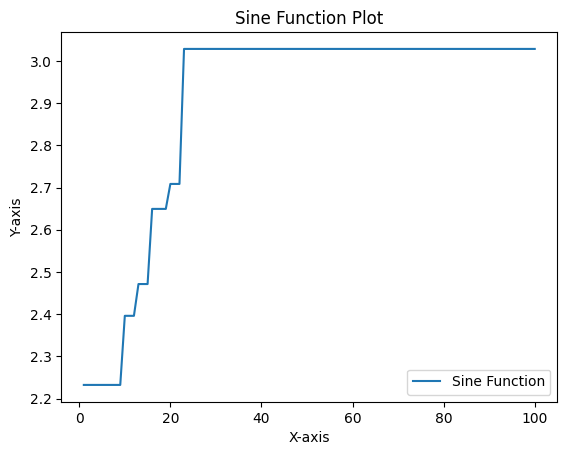

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.arange(1, 101)

result_numbers = []
for number in champions_GA:
    result_numbers.append(39.804 / number)
y = result_numbers


# Plot the data
plt.plot(x, y, label='Sine Function')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sine Function Plot')

# Add a legend
plt.legend()

# Show the plot
plt.show()


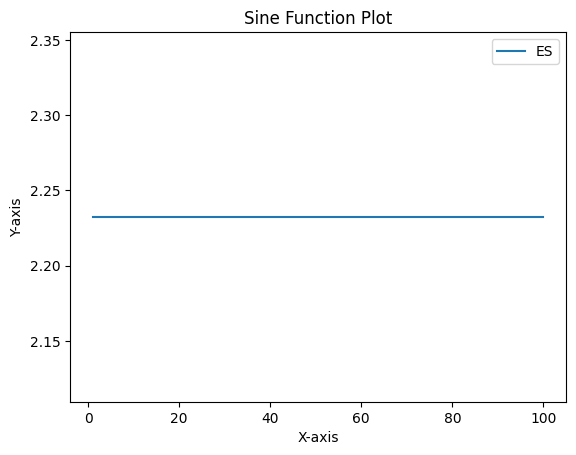

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.arange(1, 101)

result_numbers = []
for number in champions_ES:
    result_numbers.append(39.804 / number)
y = result_numbers


# Plot the data
plt.plot(x, y, label='ES')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sine Function Plot')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
plt.plot([i] for i in range(0,100), champions_GA)

SyntaxError: ignored

In [ ]:
plt.plot([i] for i in range(0,100), champions_ES)

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(ES_speedups).to_csv('ES_speedup6.csv', encoding='utf-8-sig')

Visualizing results

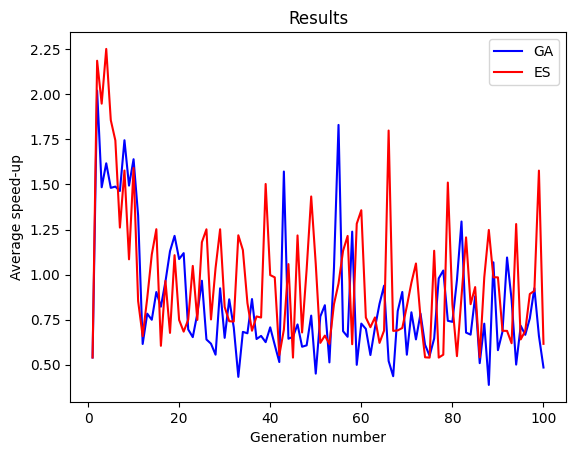

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for two lines
x_values = np.arange(1, 101)  # X-axis values from 1 to 100

GA_speedups[0] = 0.54
ES_speedups[0] = 0.54

# Plot the lines
plt.plot(x_values, GA_speedups, label='GA', linestyle='-', color='b')
plt.plot(x_values, ES_speedups, label='ES', linestyle='-', color='r')

# Standard errors
# std_error_GA = np.std(GA_speedups)/ np.sqrt(len(GA_speedups))
# std_error_ES = np.std(ES_speedups) / np.sqrt(len(ES_speedups))



# plt.errorbar(x_values, GA_speedups, yerr=std_GA, label='GA', linestyle='-', color='b')
# plt.errorbar(x_values, ES_speedups, yerr=ES_std, label='ES', linestyle='-', color='r')


# Add labels and title
plt.xlabel('Generation number')
plt.ylabel('Average speed-up')
plt.title('Results')

# Add a legend
plt.legend()

# Display the graph
plt.show()


In [ ]:
print(np.mean(std_GA))
print(np.mean(ES_std))

0.13988201726231486
0.1287109343643639


In [ ]:
from scipy import stats


In [ ]:
t_statistic, p_value = stats.ttest_ind(std_GA, ES_std)
p_value

0.16318627106643846

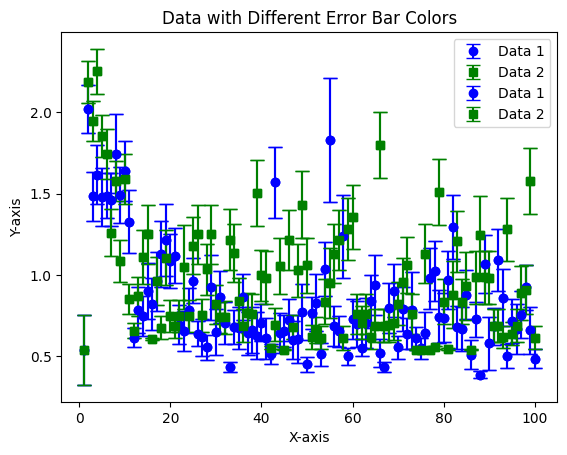

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.arange(1, 101)  # X-axis values from 1 to 100

GA_speedups[0] = 0.54
ES_speedups[0] = 0.54

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data with error bars
ax.errorbar(x_values, GA_speedups, yerr=std_GA, fmt='o', color='blue', label='Data 1', capsize=5)
ax.errorbar(x_values, ES_speedups, yerr=ES_std, fmt='s', color='green', label='Data 2', capsize=5)

# Customize error bar colors
# You can set different colors for the upper and lower error bars
(_, caps, _) = ax.errorbar(x_values, GA_speedups, yerr=std_GA, fmt='o', color='blue', label='Data 1', capsize=5)
for cap in caps:
    cap.set_color('blue')  # Set the color for the caps of the error bars

(_, caps, _) = ax.errorbar(x_values, ES_speedups, yerr=ES_std, fmt='s', color='green', label='Data 2', capsize=5)
for cap in caps:
    cap.set_color('green')  # Set the color for the caps of the error bars

# Add legend and labels
ax.legend()
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Data with Different Error Bar Colors')

# Show the plot
plt.show()


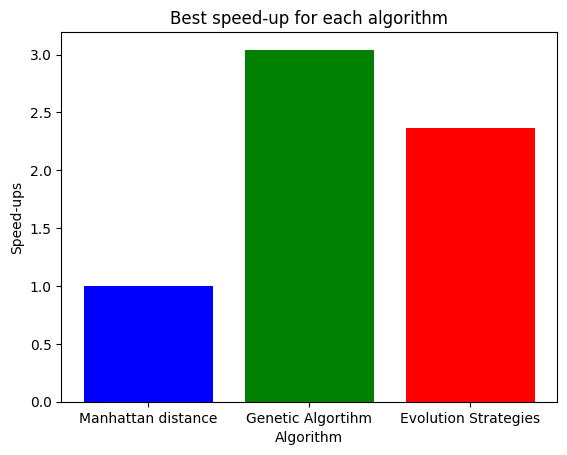

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Manhattan distance', 'Genetic Algortihm', 'Evolution Strategies']
values = [1, 39.804/13.084, 39.804/16.812]

# Create a bar plot
plt.bar(categories, values, color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Speed-ups')
plt.title('Best speed-up for each algorithm')

# Show the plot
plt.show()


GA best 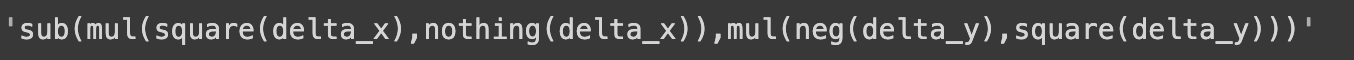

ES best 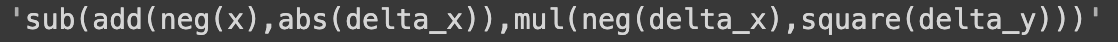

In [ ]:
GA_champions

[2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.396099205393692,
 2.396099205393692,
 2.396099205393692,
 2.4713771265366944,
 2.4713771265366944,
 2.4713771265366944,
 2.6493610223642174,
 2.6493610223642174,
 2.6493610223642174,
 2.6493610223642174,
 2.7084921066956995,
 2.7084921066956995,
 2.7084921066956995,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.028301886792453,
 3.0283018

In [ ]:
ES_champions

[2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,
 2.232417274256871,


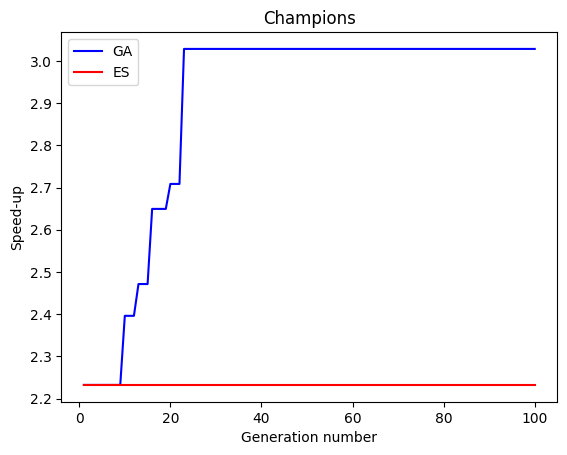

In [ ]:
plt.plot(x_values, GA_champions, label='GA', linestyle='-', color='b')
plt.plot(x_values, ES_champions, label='ES', linestyle='-', color='r')

plt.xlabel('Generation number')
plt.ylabel('Speed-up')
plt.title('Champions')

# Add a legend
plt.legend()

# Display the graph
plt.show()